## 实验要求
### 截止日期：11月3日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$
在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。


### 中级要求
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

### 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

### 基本要求

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal
from functools import partial
import matplotlib.pyplot as plt

In [2]:
N = 1000  # 各数据集中的向量数量
mu1 = np.array([1, 4])# 第1个分布的均值向量
mu2 = np.array([4, 1])# 第2个分布的均值向量
mu3 = np.array([8, 4])# 第3个分布的均值向量
cov_matrix = 2 * np.identity(2)  # 协方差矩阵

prior_probs_x1 = [1/3, 1/3, 1/3] # 数据集合X1中三个类别的先验概率
prior_probs_x2 = [0.6, 0.3, 0.1] # 数据集合X2中三个类别的先验概率

In [3]:
# 根据不同的先验概率生成随机向量数据集，X2中的每个类别将按照prior_probs_x2中指定的比例生成
X1 = np.vstack([
    np.random.multivariate_normal(mu1, cov_matrix, int(N * prior_probs_x1[0])),
    np.random.multivariate_normal(mu2, cov_matrix, int(N * prior_probs_x1[1])),
    np.random.multivariate_normal(mu3, cov_matrix, int(N * prior_probs_x1[2]))
])

In [4]:
# 生成X1对应的标签
true_labels_X1 = np.repeat([1, 2, 3], [int(N * prior_probs_x1[0]), int(N * prior_probs_x1[1]), int(N * prior_probs_x1[2])])

In [5]:
# 根据不同的先验概率生成随机向量数据集，X2中的每个类别将按照prior_probs_x2中指定的比例生成
X2 = np.vstack([
    np.random.multivariate_normal(mu1, cov_matrix, int(N * prior_probs_x2[0])),
    np.random.multivariate_normal(mu2, cov_matrix, int(N * prior_probs_x2[1])),
    np.random.multivariate_normal(mu3, cov_matrix, int(N * prior_probs_x2[2]))
])

In [6]:
# 生成X2对应的标签
true_labels_X2 = np.repeat([1, 2, 3], [int(N * prior_probs_x2[0]), int(N * prior_probs_x2[1]), int(N * prior_probs_x2[2])])

In [7]:
# 定义似然率测试规则
def likelihood_ratio_test(x, means, cov):
    likelihoods = [multivariate_normal(x, mean=mu, cov=cov) for mu in means]
    return np.argmax(likelihoods) + 1 # 类别从1开始

In [8]:
# 最大后验概率规则
def maximum_a_posteriori_test(x, means, cov, priors):
    posteriors = [p * multivariate_normal(x, mu, cov) for p, mu in zip(priors, means)]
    return np.argmax(posteriors) + 1  # 类别从1开始

In [9]:
# 多元正态分布概率密度函数
def multivariate_normal(x, mean, cov):
    d = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_cov), (x - mean))
    return 1 / (2 * np.pi) ** (d/2) / np.sqrt(det_cov) * np.exp(exponent)

In [10]:
# 分类实验并计算错误率
def classify_and_compute_error(data, labels, classifier, means, cov, priors=None):
    errors = 0
    for i in range(len(data)):
        x = data[i]
        true_label = labels[i]
        if priors is not None:
            predicted_label = classifier(x, means, cov, priors)
        else:
            predicted_label = classifier(x, means, cov)
        if predicted_label != true_label:
            errors += 1
    error_rate = errors / len(data)
    return error_rate

In [11]:
# 似然率测试规则分类错误率
error_rate_X1_likelihood = classify_and_compute_error(X1, true_labels_X1, likelihood_ratio_test, [mu1, mu2, mu3], cov_matrix)
error_rate_X2_likelihood = classify_and_compute_error(X2, true_labels_X2, likelihood_ratio_test, [mu1, mu2, mu3], cov_matrix)

In [12]:
# 最大后验概率规则分类错误率
error_rate_X1_map = classify_and_compute_error(X1, true_labels_X1, maximum_a_posteriori_test, [mu1, mu2, mu3], cov_matrix, prior_probs_x1)
error_rate_X2_map = classify_and_compute_error(X2, true_labels_X2, maximum_a_posteriori_test, [mu1, mu2, mu3], cov_matrix, prior_probs_x2)

In [13]:
# 输出结果
print(f"似然率测试规则 X1 错误率: {error_rate_X1_likelihood:.4f}")
print(f"似然率测试规则 X2 错误率: {error_rate_X2_likelihood:.4f}")
print(f"最大后验概率规则 X1 错误率: {error_rate_X1_map:.4f}")
print(f"最大后验概率规则 X2 错误率: {error_rate_X2_map:.4f}")

似然率测试规则 X1 错误率: 0.0761
似然率测试规则 X2 错误率: 0.0740
最大后验概率规则 X1 错误率: 0.0761
最大后验概率规则 X2 错误率: 0.0680


### 中级要求

In [14]:
# 高斯核函数
def gaussian_kernel(x, X, h):
    return np.exp(-0.5 * np.sum((x - X)**2) / h**2)

In [15]:
# 交叉验证
def cross_validation(X, labels, h_values, classifier, priors=None):
     # 初始化最佳 h 值和最佳错误率
    best_h = None
    best_error = float('inf')

     # 遍历不同的 h 值
    for h in h_values:
        total_error = 0

         # 进行 10 次交叉验证
        for _ in range(10):  
            X_train, X_test, labels_train, labels_test = train_test_split(X, labels, test_size=0.2, random_state=0)

            # 估计概率密度函数
            estimates = []
            for i in range(1, 4):  # 类别从1到3
                 # 从训练集中提取属于当前类别的样本
                class_data = X_train[labels_train == i]
                # 估计测试集中每个样本的概率密度
                estimate = np.sum([gaussian_kernel(x, class_data, h) for x in X_test], axis=0)
                estimates.append(estimate)

            # 使用分类器进行分类
            # 通过传递估计的概率密度和类别索引，获取预测的类别标签
            predicted_labels = np.array([classifier(estimates, i) for i in range(1, 4)])
             
            # 计算错误率
            # 将预测标签与测试集的真实标签进行比较，计算分类错误率
            error = np.sum(predicted_labels != labels_test) / len(labels_test)
            total_error += error

        # 计算平均错误率
        average_error = total_error / 10

        # 更新最佳 h 值和最佳错误率
        if average_error < best_error:
            best_error = average_error
            best_h = h

    return best_h, best_error

In [16]:
# 似然率测试规则
def likelihood_ratio_tests(estimates, true_label):
    likelihoods = [estimates[i] for i in range(3)]
    return np.argmax(likelihoods) + 1

In [17]:
# 最大后验概率规则
def maximum_a_posteriori_tests(estimates, true_label, priors):
    posteriors = [p * estimates[i] for i, p in enumerate(priors)]
    return np.argmax(posteriors) + 1

In [18]:
# 指定要测试的h值范围
h_values = [0.1, 0.5, 1, 1.5, 2]

In [19]:
# 在X1上找到最佳h值

# 创建一个带有指定先验概率的版本的最大后验概率规则函数
maximum_a_posteriori_test_with_priors_x1 = partial(maximum_a_posteriori_tests, priors=prior_probs_x1)

best_h_X1_likelihood, best_error_X1_likelihood = cross_validation(X1, true_labels_X1, h_values, likelihood_ratio_tests)
best_h_X1_map, best_error_X1_map = cross_validation(X1, true_labels_X1, h_values, maximum_a_posteriori_test_with_priors_x1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22376\2307361898.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error = np.sum(predicted_labels != labels_test) / len(labels_test)


In [20]:
# 在X2上找到最佳h值

# 创建一个带有指定先验概率的版本的最大后验概率规则函数
maximum_a_posteriori_test_with_priors_x2 = partial(maximum_a_posteriori_tests, priors=prior_probs_x2)

best_h_X2_likelihood, best_error_X2_likelihood = cross_validation(X2, true_labels_X2, h_values, likelihood_ratio_tests)
best_h_X2_map, best_error_X2_map = cross_validation(X2, true_labels_X2, h_values, maximum_a_posteriori_test_with_priors_x2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22376\2307361898.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error = np.sum(predicted_labels != labels_test) / len(labels_test)


In [21]:
# 输出结果
print("数据集X1：")
print(f"似然率测试规则 - 最佳h值: {best_h_X1_likelihood:.2f}, 最佳错误率: {best_error_X1_likelihood:.4f}")
print(f"最大后验概率规则 - 最佳h值: {best_h_X1_map:.2f}, 最佳错误率: {best_error_X1_map:.4f}")

print("\n数据集X2：")
print(f"似然率测试规则 - 最佳h值: {best_h_X2_likelihood:.2f}, 最佳错误率: {best_error_X2_likelihood:.4f}")
print(f"最大后验概率规则 - 最佳h值: {best_h_X2_map:.2f}, 最佳错误率: {best_error_X2_map:.4f}")

数据集X1：
似然率测试规则 - 最佳h值: 0.10, 最佳错误率: 0.0050
最大后验概率规则 - 最佳h值: 0.10, 最佳错误率: 0.0050

数据集X2：
似然率测试规则 - 最佳h值: 0.10, 最佳错误率: 0.0050
最大后验概率规则 - 最佳h值: 0.10, 最佳错误率: 0.0050


### 高级要求

In [22]:
# 定义k值
k_values = [1, 3, 5]

In [23]:
# 定义一个函数来执行k-NN概率密度估计并绘制结果
def knn_density_estimation(X, k_values, title):
    for k in k_values:
        kde = KernelDensity(bandwidth=0.3, kernel='gaussian')
        kde.fit(X)

        # 创建一个网格用于计算密度
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]

        # 计算估计的密度
        log_dens = kde.score_samples(grid_points)
        dens = np.exp(log_dens)
        dens = dens.reshape(xx.shape)

        # 绘制估计的密度
        plt.figure()
        plt.contourf(xx, yy, dens, cmap='Blues')
        plt.scatter(X[:, 0], X[:, 1], c='k', s=0.5)
        plt.title(f'k-NN Density Estimation (k={k}) - {title}')
        plt.show()
        
        # 打印概率密度估计的数值结果
        print(f'k-NN Density Estimation (k={k}) - {title}')
        print(dens)

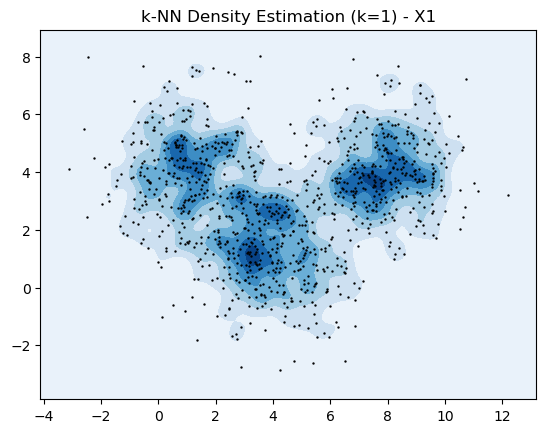

k-NN Density Estimation (k=1) - X1
[[3.14050399e-066 3.27481601e-064 3.05576195e-062 ... 1.65418335e-101
  1.03352445e-102 5.77930596e-104]
 [7.01197440e-065 7.31186018e-063 6.82276624e-061 ... 1.08365674e-098
  6.77115449e-100 3.78643914e-101]
 [1.40096199e-063 1.46087786e-061 1.36315902e-059 ... 6.35273379e-096
  3.96968413e-097 2.21990184e-098]
 ...
 [1.55076216e-011 9.41358325e-011 5.11340036e-010 ... 4.03229909e-021
  3.12023713e-022 2.16056591e-023]
 [6.48171553e-012 3.93459232e-011 2.13724628e-010 ... 7.24283883e-022
  5.60458788e-023 3.88082092e-024]
 [2.42426335e-012 1.47159929e-011 7.99363656e-011 ... 1.16415273e-022
  9.00834114e-024 6.23770374e-025]]


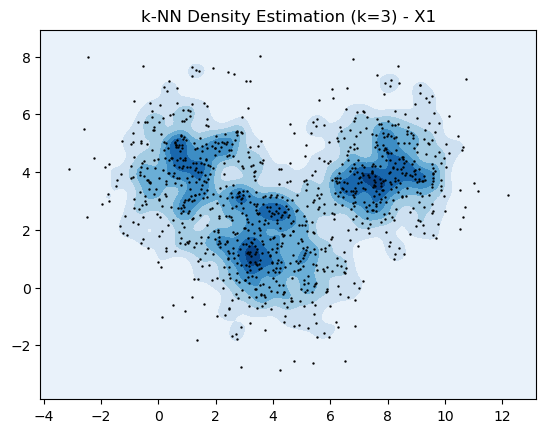

k-NN Density Estimation (k=3) - X1
[[3.14050399e-066 3.27481601e-064 3.05576195e-062 ... 1.65418335e-101
  1.03352445e-102 5.77930596e-104]
 [7.01197440e-065 7.31186018e-063 6.82276624e-061 ... 1.08365674e-098
  6.77115449e-100 3.78643914e-101]
 [1.40096199e-063 1.46087786e-061 1.36315902e-059 ... 6.35273379e-096
  3.96968413e-097 2.21990184e-098]
 ...
 [1.55076216e-011 9.41358325e-011 5.11340036e-010 ... 4.03229909e-021
  3.12023713e-022 2.16056591e-023]
 [6.48171553e-012 3.93459232e-011 2.13724628e-010 ... 7.24283883e-022
  5.60458788e-023 3.88082092e-024]
 [2.42426335e-012 1.47159929e-011 7.99363656e-011 ... 1.16415273e-022
  9.00834114e-024 6.23770374e-025]]


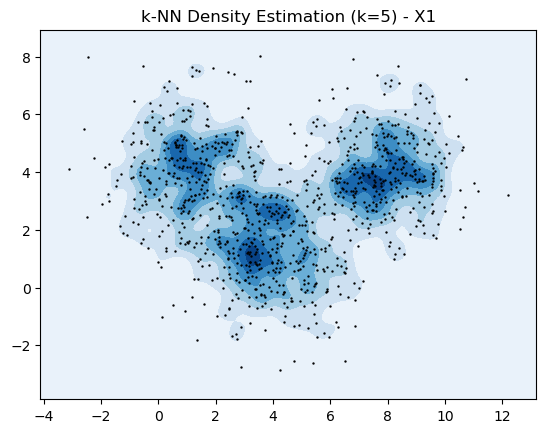

k-NN Density Estimation (k=5) - X1
[[3.14050399e-066 3.27481601e-064 3.05576195e-062 ... 1.65418335e-101
  1.03352445e-102 5.77930596e-104]
 [7.01197440e-065 7.31186018e-063 6.82276624e-061 ... 1.08365674e-098
  6.77115449e-100 3.78643914e-101]
 [1.40096199e-063 1.46087786e-061 1.36315902e-059 ... 6.35273379e-096
  3.96968413e-097 2.21990184e-098]
 ...
 [1.55076216e-011 9.41358325e-011 5.11340036e-010 ... 4.03229909e-021
  3.12023713e-022 2.16056591e-023]
 [6.48171553e-012 3.93459232e-011 2.13724628e-010 ... 7.24283883e-022
  5.60458788e-023 3.88082092e-024]
 [2.42426335e-012 1.47159929e-011 7.99363656e-011 ... 1.16415273e-022
  9.00834114e-024 6.23770374e-025]]


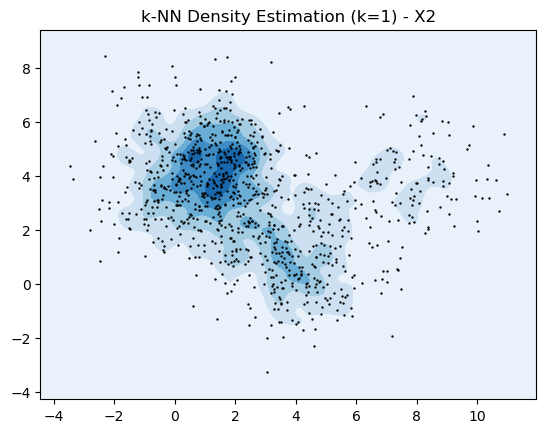

k-NN Density Estimation (k=1) - X2
[[2.47266365e-76 2.11881492e-75 1.62467335e-74 ... 9.22039259e-67
  5.50057794e-69 2.93638022e-71]
 [6.94918412e-74 5.95472618e-73 4.56598868e-72 ... 1.16412927e-65
  6.94480601e-68 3.70735425e-70]
 [1.74762259e-71 1.49753033e-70 1.14828228e-69 ... 1.31521897e-64
  7.84615662e-67 4.18852335e-69]
 ...
 [4.27067971e-16 4.39904944e-15 4.05476549e-14 ... 1.49793608e-37
  5.35244284e-38 1.71837648e-38]
 [1.69475971e-16 1.74570144e-15 1.60907716e-14 ... 2.44711860e-39
  8.72502741e-40 2.79915186e-40]
 [6.01816812e-17 6.19906452e-16 5.71390552e-15 ... 3.58152668e-41
  1.27318582e-41 4.08068366e-42]]


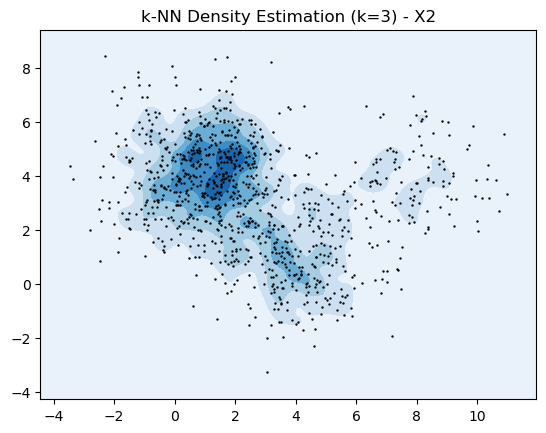

k-NN Density Estimation (k=3) - X2
[[2.47266365e-76 2.11881492e-75 1.62467335e-74 ... 9.22039259e-67
  5.50057794e-69 2.93638022e-71]
 [6.94918412e-74 5.95472618e-73 4.56598868e-72 ... 1.16412927e-65
  6.94480601e-68 3.70735425e-70]
 [1.74762259e-71 1.49753033e-70 1.14828228e-69 ... 1.31521897e-64
  7.84615662e-67 4.18852335e-69]
 ...
 [4.27067971e-16 4.39904944e-15 4.05476549e-14 ... 1.49793608e-37
  5.35244284e-38 1.71837648e-38]
 [1.69475971e-16 1.74570144e-15 1.60907716e-14 ... 2.44711860e-39
  8.72502741e-40 2.79915186e-40]
 [6.01816812e-17 6.19906452e-16 5.71390552e-15 ... 3.58152668e-41
  1.27318582e-41 4.08068366e-42]]


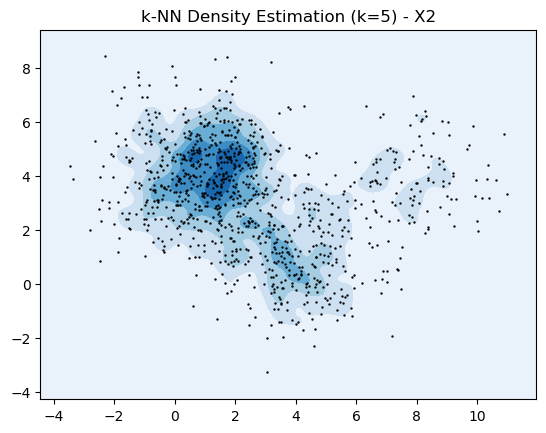

k-NN Density Estimation (k=5) - X2
[[2.47266365e-76 2.11881492e-75 1.62467335e-74 ... 9.22039259e-67
  5.50057794e-69 2.93638022e-71]
 [6.94918412e-74 5.95472618e-73 4.56598868e-72 ... 1.16412927e-65
  6.94480601e-68 3.70735425e-70]
 [1.74762259e-71 1.49753033e-70 1.14828228e-69 ... 1.31521897e-64
  7.84615662e-67 4.18852335e-69]
 ...
 [4.27067971e-16 4.39904944e-15 4.05476549e-14 ... 1.49793608e-37
  5.35244284e-38 1.71837648e-38]
 [1.69475971e-16 1.74570144e-15 1.60907716e-14 ... 2.44711860e-39
  8.72502741e-40 2.79915186e-40]
 [6.01816812e-17 6.19906452e-16 5.71390552e-15 ... 3.58152668e-41
  1.27318582e-41 4.08068366e-42]]


In [24]:
knn_density_estimation(X1, k_values, 'X1')
knn_density_estimation(X2, k_values, 'X2')